In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
import datetime
from dotenv import load_dotenv

In [3]:
print(sys.path)

['/Users/tdowning/OCHA/repos/pa-aa-ner-flooding/exploration', '/Users/tdowning/.pyenv/versions/3.11.4/lib/python311.zip', '/Users/tdowning/.pyenv/versions/3.11.4/lib/python3.11', '/Users/tdowning/.pyenv/versions/3.11.4/lib/python3.11/lib-dynload', '', '/Users/tdowning/.pyenv/versions/pa-aa-ner-flooding/lib/python3.11/site-packages', '/Users/tdowning/OCHA/repos/ocha-anticipy/src']


In [4]:
from ochanticipy import (
    create_country_config,
    CodAB,
    GeoBoundingBox,
    GlofasForecast,
    GlofasReanalysis,
    GlofasReforecast,
)

/Users/tdowning/.pyenv/versions/pa-aa-ner-flooding/lib/python3.11/site-packages/quantulum3/classifier.py:28: UserWarning: Classifier dependencies not installed. Run pip install quantulum3[classifier] to install them. The classifer helps to dissambiguate units.
  warnings.warn(


In [5]:
load_dotenv()

True

In [6]:
adm1_sel = ["Tillabéri", "Niamey", "Dosso", "Maradi"]
startdate = datetime.date(2022, 8, 20)
enddate = datetime.date(2022, 8, 21)

country_config = create_country_config(iso3="ner")
codab = CodAB(country_config=country_config)
# codab.download()
gdf_adm1 = codab.load(admin_level=1)
gdf_aoi = gdf_adm1[gdf_adm1["adm_01"].isin(adm1_sel)]
geobb = GeoBoundingBox.from_shape(gdf_aoi)

In [7]:
forecast = GlofasForecast(
    country_config=country_config,
    geo_bounding_box=geobb,
    leadtime_max=15,
    start_date=startdate,
    end_date=enddate,
)
reanalysis = GlofasReanalysis(
    country_config=country_config,
    geo_bounding_box=geobb,
    start_date=startdate,
    end_date=enddate,
)
reforecast = GlofasReforecast(
    country_config=country_config,
    geo_bounding_box=geobb,
    leadtime_max=15,
    start_date=startdate,
    end_date=enddate,
)

In [8]:
reforecast.download()

2023-08-22 16:41:27,864 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-08-22 16:41:27,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-reforecast
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-reforecast
2023-08-22 16:53:30,669 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/adaptor.mars.external-1692747688.562677-12810-12-75c29acb-2ae2-45b1-8385-7d10cac2a016.grib to /Users/tdowning/Insync/tristan.downing@humdata.org/Google Drive - Shared drives/Predictive Analytics/CERF Anticipatory Action/General - All AA projects/Data/public/raw/ner/glofas/cems-glofas-reforecast/ner_cems-glofas-reforecast_v4_2022-08_ltmax15d_Np15d725Sp11d625Ep8d575Wp0d125.grib (54.7M)
INFO:cdsapi:Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/adaptor.mars.external-1692747688.562677-12810-12-75c29acb-2ae2-45b1-8385-7d10cac

[PosixPath('/Users/tdowning/Insync/tristan.downing@humdata.org/Google Drive - Shared drives/Predictive Analytics/CERF Anticipatory Action/General - All AA projects/Data/public/raw/ner/glofas/cems-glofas-reforecast/ner_cems-glofas-reforecast_v4_2022-08_ltmax15d_Np15d725Sp11d625Ep8d575Wp0d125.grib')]

In [9]:
reforecast.process()

[PosixPath('/Users/tdowning/Insync/tristan.downing@humdata.org/Google Drive - Shared drives/Predictive Analytics/CERF Anticipatory Action/General - All AA projects/Data/public/processed/ner/glofas/ner_cems-glofas-reforecast_v4_2022-08_ltmax15d_Np15d725Sp11d625Ep8d575Wp0d125_processed.nc')]

(array([329.,  82., 316., 304., 153.,  79.,  43.,  12.,   0.,   2.]),
 array([ 674.203125  , 1531.41638184, 2388.62963867, 3245.84301758,
        4103.05615234, 4960.26953125, 5817.48291016, 6674.69628906,
        7531.90917969, 8389.12304688, 9246.3359375 ]),
 <BarContainer object of 10 artists>)

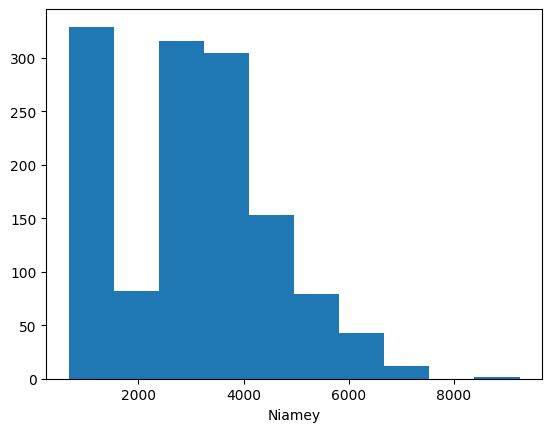

In [10]:
ds = reforecast.load()
da = ds["Niamey"]
da.plot()

In [11]:
reanalysis.download()

2023-08-22 16:58:45,793 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-08-22 16:58:45,796 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-historical
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-historical
2023-08-22 17:02:46,987 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/adaptor.mars.external-1692748726.6198184-29845-14-6a45cfb0-da5f-4edc-b36d-aba6b23b8bf7.grib to /Users/tdowning/Insync/tristan.downing@humdata.org/Google Drive - Shared drives/Predictive Analytics/CERF Anticipatory Action/General - All AA projects/Data/public/raw/ner/glofas/cems-glofas-historical/ner_cems-glofas-historical_v4_2022_Np15d725Sp11d625Ep8d575Wp0d125.grib (15.1M)
INFO:cdsapi:Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/adaptor.mars.external-1692748726.6198184-29845-14-6a45cfb0-da5f-4edc-b36d-aba6b23b8bf7.grib to /Users/t

[PosixPath('/Users/tdowning/Insync/tristan.downing@humdata.org/Google Drive - Shared drives/Predictive Analytics/CERF Anticipatory Action/General - All AA projects/Data/public/raw/ner/glofas/cems-glofas-historical/ner_cems-glofas-historical_v4_2022_Np15d725Sp11d625Ep8d575Wp0d125.grib')]

In [12]:
reanalysis.process()

[PosixPath('/Users/tdowning/Insync/tristan.downing@humdata.org/Google Drive - Shared drives/Predictive Analytics/CERF Anticipatory Action/General - All AA projects/Data/public/processed/ner/glofas/ner_cems-glofas-historical_v4_2022_Np15d725Sp11d625Ep8d575Wp0d125_processed.nc')]

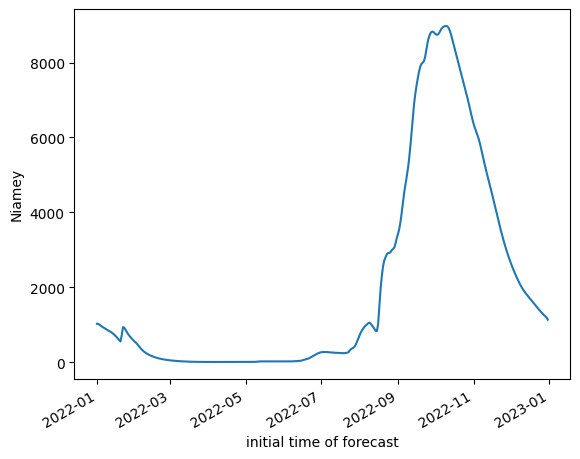

In [13]:
ds = reanalysis.load()
da = ds["Niamey"]

da.plot()

In [14]:
forecast.download()

2023-08-22 17:03:26,889 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-08-22 17:03:26,892 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-forecast
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-forecast
2023-08-22 17:03:27,298 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-08-22 17:03:27,313 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-forecast
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-forecast
2023-08-22 17:05:28,515 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data0/adaptor.mars.external-1692749009.1357844-16200-14-0d6f910f-a5a6-4220-b677-b8c9ab2d3649.grib to /Users/tdowning/Insync/tristan.downing@humdata.org/Google Drive - Shared drives/Predictive Analytics/CERF Anticipatory Action/General - All AA projects/Data/public/raw/ner/glofas/

[PosixPath('/Users/tdowning/Insync/tristan.downing@humdata.org/Google Drive - Shared drives/Predictive Analytics/CERF Anticipatory Action/General - All AA projects/Data/public/raw/ner/glofas/cems-glofas-forecast/ner_cems-glofas-forecast_v4_2022-08-20_ltmax15d_Np15d725Sp11d625Ep8d575Wp0d125.grib'),
 PosixPath('/Users/tdowning/Insync/tristan.downing@humdata.org/Google Drive - Shared drives/Predictive Analytics/CERF Anticipatory Action/General - All AA projects/Data/public/raw/ner/glofas/cems-glofas-forecast/ner_cems-glofas-forecast_v4_2022-08-21_ltmax15d_Np15d725Sp11d625Ep8d575Wp0d125.grib')]

In [15]:
forecast.process()

[PosixPath('/Users/tdowning/Insync/tristan.downing@humdata.org/Google Drive - Shared drives/Predictive Analytics/CERF Anticipatory Action/General - All AA projects/Data/public/processed/ner/glofas/ner_cems-glofas-forecast_v4_2022-08-20_ltmax15d_Np15d725Sp11d625Ep8d575Wp0d125_processed.nc'),
 PosixPath('/Users/tdowning/Insync/tristan.downing@humdata.org/Google Drive - Shared drives/Predictive Analytics/CERF Anticipatory Action/General - All AA projects/Data/public/processed/ner/glofas/ner_cems-glofas-forecast_v4_2022-08-21_ltmax15d_Np15d725Sp11d625Ep8d575Wp0d125_processed.nc')]

In [16]:
d = forecast.load()

In [17]:
df = d.to_dataframe()

<Axes: xlabel='step'>

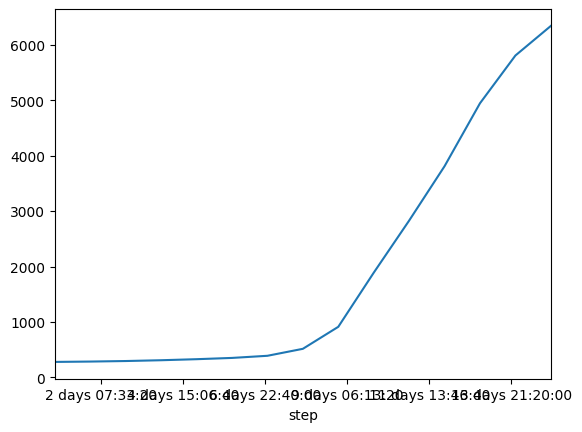

In [18]:
df.loc[("2022-08-20", 0)]["Niamey"].plot()